<a href="https://colab.research.google.com/github/MJEFFTKM/tracking-deviant-behavior-on-social-networks/blob/main/social_network_lem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 8.2MB 17.4MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
import tensorflow as tf
#import tflearn
import re

from collections import Counter
from sklearn.model_selection import train_test_split
#from tflearn.data_utils import to_categorical
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import TweetTokenizer

from nltk.corpus import stopwords
import pymorphy2
import nltk

In [ ]:
temp_words = open("/content/gdrive/MyDrive/PROJECT_SOCIAL_NETWORK/russian", "r")
stop_words = []
for i in temp_words:
    stop_words.append(i[:-1:])

In [ ]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина комментария
max_comment_len = 50

In [ ]:
VOCAB_SIZE = 5000 #ЭТО ШУКУ НАДО КРУТИТЬ, ЕСЛИ ВСЕ ПЛОХО БУДЕТ

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/PROJECT_SOCIAL_NETWORK/final_df.csv')

In [ ]:
df.head()

,Unnamed: 0,text,normal,insult,obscenity,threat
0,0,я сегодня проезжала по рабочей и между домами...,1,0,0,0
1,1,очередной лохотрон. зачем придумывать очередн...,1,0,0,0
2,2,"ретро дежавю ... сложно понять чужое сердце ,...",1,0,0,0
3,3,а когда мы статус агрогородка получили?,1,0,0,0
4,4,2 августа поздно вечером нашли вот такую поте...,1,0,0,0


In [ ]:
data_positive = df[df['normal'] == 1]
data_negative = df[df['normal'] != 1]

# Формируем сбалансированный датасет
sample_size = min(data_positive.shape[0], data_negative.shape[0])
raw_data = np.concatenate((data_positive['text'].values[:sample_size],
                           data_negative['text'].values[:sample_size]), axis=0)
labels = [1] * sample_size + [0] * sample_size

In [ ]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()



In [ ]:
morph = pymorphy2.MorphAnalyzer()

def lemmatize_stop(text):
    text = text.lower()
    res = []
    words = text.split()
    for word in words:
        if word not in stop_words:
            p = morph.parse(word)[0]
            res.append(p.normal_form)

    return res

In [ ]:
data = [preprocess_text(t) for t in raw_data]
data = [lemmatize_stop(t) for t in data]

In [ ]:
data

[['сегодня',
  'проезжать',
  'рабочий',
  'дом',
  'снитенко',
  'гомолысов',
  'магазин',
  'пустырь',
  'бежать',
  'кошка',
  'похожий',
  'окрас',
  'ошибиться',
  'необычный',
  'окрас',
  'броситься',
  'глаз'],
 ['очередной',
  'лохотрон',
  'придумывать',
  'очередной',
  'налог',
  'воздух',
  'обьявить',
  'инсульт',
  'грипп',
  'пандемия',
  'лихо',
  'придурок',
  'зарабатывать',
  'год',
  'штраф',
  'фейковый',
  'вакцина',
  'всевозможный',
  'платный',
  'тест',
  'продажа',
  'маска',
  'перчатка',
  'баснословный',
  'цена',
  'самый',
  'смешной',
  'баран',
  'блеять',
  'верить',
  'пастух',
  'телевизор',
  'жить',
  'гипноз',
  'думать',
  'глядеть',
  'сторона'],
 ['ретро',
  'дежавю',
  'сложно',
  'понять',
  'чужое',
  'сердце',
  'лиш',
  'ощутить',
  'музыка',
  'видимо'],
 ['статус', 'агрогородок', 'получить'],
 ['август',
  'поздно',
  'вечером',
  'наслать',
  'такой',
  'потеряшка',
  'рая',
  'оне',
  'высотка',
  'победа',
  'девочка',
  'явно',
  '

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

In [ ]:
x_train

[['алексей',
  'возможность',
  'присутствовать',
  'киров',
  'повод',
  'согласие',
  'жилец',
  'проверка',
  'прокуратура',
  'подпись',
  'компания',
  'дом'],
 ['такой', 'прикольный'],
 ['поздноватый', 'спохватиться', 'долбаести'],
 ['ждать', 'инкосатор'],
 ['новенький'],
 ['действительно',
  'предлагать',
  'жильё',
  'условие',
  'газ',
  'платить',
  'нуднт',
  'коммунальный',
  'жильё',
  'центр',
  'ярморочный',
  'квартирный',
  'дом',
  'действительно',
  'негде',
  'жить',
  'мочь',
  'это',
  'помочь'],
 ['убийца',
  'мой',
  'дочь',
  'год',
  'выйти',
  'жить',
  'бывало',
  'отец',
  'хвастаться',
  'документ',
  'сделать',
  'чистый',
  'судимость',
  'мой',
  'девочка',
  'исполниться',
  'будущий',
  'программист',
  'тихий',
  'домашний',
  'ребёнок'],
 ['миновый',
  'честно',
  'дурак',
  'подумать',
  'свой',
  'жена',
  'ты',
  'дать',
  'двое',
  'прекрасный',
  'сын'],
 ['сколько', 'обойтись', 'химия'],
 ['милостивый', 'к', 'весь', 'свет', 'так', 'быть', 'оши

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.word_index

{}

In [ ]:
tokenizer.fit_on_texts(x_train)

In [ ]:
tokenizer.word_index

{'это': 1,
 'такой': 2,
 'человек': 3,
 'свой': 4,
 'тварь': 5,
 'быть': 6,
 'весь': 7,
 'ты': 8,
 'этот': 9,
 'год': 10,
 'сука': 11,
 'ребёнок': 12,
 'пидор': 13,
 'очень': 14,
 'который': 15,
 'просто': 16,
 'd': 17,
 'наш': 18,
 'один': 19,
 'народ': 20,
 'россия': 21,
 'жить': 22,
 'сам': 23,
 'какой': 24,
 'хотеть': 25,
 'твой': 26,
 'день': 27,
 'блядь': 28,
 'хуй': 29,
 'мразь': 30,
 'знать': 31,
 'страна': 32,
 'жизнь': 33,
 'урод': 34,
 'ваш': 35,
 'кто': 36,
 'сказать': 37,
 'мочь': 38,
 'нужно': 39,
 'тот': 40,
 'путин': 41,
 'делать': 42,
 'дать': 43,
 'хороший': 44,
 'идти': 45,
 'пусть': 46,
 'жопа': 47,
 'спасибо': 48,
 'сколько': 49,
 'говорить': 50,
 'время': 51,
 'рука': 52,
 'б': 53,
 'слово': 54,
 'бог': 55,
 'писать': 56,
 'мой': 57,
 'дебил': 58,
 'деньга': 59,
 'другой': 60,
 'место': 61,
 'смотреть': 62,
 'здоровье': 63,
 'сделать': 64,
 'друг': 65,
 'расстрелять': 66,
 'добрый': 67,
 'думать': 68,
 'работать': 69,
 'вообще': 70,
 'самый': 71,
 'каждый': 72,
 '

In [ ]:
x_train

[['алексей',
  'возможность',
  'присутствовать',
  'киров',
  'повод',
  'согласие',
  'жилец',
  'проверка',
  'прокуратура',
  'подпись',
  'компания',
  'дом'],
 ['такой', 'прикольный'],
 ['поздноватый', 'спохватиться', 'долбаести'],
 ['ждать', 'инкосатор'],
 ['новенький'],
 ['действительно',
  'предлагать',
  'жильё',
  'условие',
  'газ',
  'платить',
  'нуднт',
  'коммунальный',
  'жильё',
  'центр',
  'ярморочный',
  'квартирный',
  'дом',
  'действительно',
  'негде',
  'жить',
  'мочь',
  'это',
  'помочь'],
 ['убийца',
  'мой',
  'дочь',
  'год',
  'выйти',
  'жить',
  'бывало',
  'отец',
  'хвастаться',
  'документ',
  'сделать',
  'чистый',
  'судимость',
  'мой',
  'девочка',
  'исполниться',
  'будущий',
  'программист',
  'тихий',
  'домашний',
  'ребёнок'],
 ['миновый',
  'честно',
  'дурак',
  'подумать',
  'свой',
  'жена',
  'ты',
  'дать',
  'двое',
  'прекрасный',
  'сын'],
 ['сколько', 'обойтись', 'химия'],
 ['милостивый', 'к', 'весь', 'свет', 'так', 'быть', 'оши

In [ ]:
sequences = tokenizer.texts_to_sequences(x_train)#?????????????????

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_comment_len)

In [ ]:
print(x_train[0])
print(data[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 2202  912 5189 5498
  991 4445 5499 3765 5837 2484 1477   77]
['сегодня', 'проезжать', 'рабочий', 'дом', 'снитенко', 'гомолысов', 'магазин', 'пустырь', 'бежать', 'кошка', 'похожий', 'окрас', 'ошибиться', 'необычный', 'окрас', 'броситься', 'глаз']


сеть LSTM


In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(1, activation='sigmoid')) #4 т.к. четыре класса токсичности.

In [ ]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'AUC'])

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            27040     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 1,320,041
Trainable params: 1,320,041
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
y_train = np.array(y_train)

In [ ]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/10
112/112 [==============================] - 36s 40ms/step - loss: 0.5773 - accuracy: 0.6675 - auc: 0.7404 - val_loss: 0.1934 - val_accuracy: 0.9308 - val_auc: 0.9753

Epoch 00001: val_accuracy improved from -inf to 0.93078, saving model to best_model_lstm.h5
Epoch 2/10
112/112 [==============================] - 3s 30ms/step - loss: 0.1598 - accuracy: 0.9437 - auc: 0.9830 - val_loss: 0.1637 - val_accuracy: 0.9417 - val_auc: 0.9817

Epoch 00002: val_accuracy improved from 0.93078 to 0.94171, saving model to best_model_lstm.h5
Epoch 3/10
112/112 [==============================] - 3s 31ms/step - loss: 0.1145 - accuracy: 0.9622 - auc: 0.9903 - val_loss: 0.1624 - val_accuracy: 0.9430 - val_auc: 0.9824

Epoch 00003: val_accuracy improved from 0.94171 to 0.94304, saving model to best_model_lstm.h5
Epoch 4/10
112/112 [==============================] - 3s 31ms/step - loss: 0.1025 - accuracy: 0.9658 - auc: 0.9923 - val_loss: 0.1703 - val_accuracy: 0.9423 - val_auc: 0.9813

Epoch 00004: 

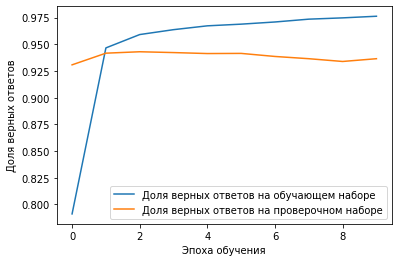

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

пробуем свои примеры


In [ ]:
text = '''Если этот пост оказался у меня на стене - значит, я-таки зарезал своего одногруппника-крысу и на данный момент либо суициднулся, либо дал по съёбам, либо был принят сотрудниками органов.
Что имею сказать?
Убил я этого дурачка не из-за того, что он "бабу увёл" - это, в сущности, второстепенное. Дело в том, что меня невероятно взбесила и не давала покоя его позиция в духе "Я был таким, как ты, и за это себя ненавижу; У меня есть честь" - он и понятия не имел не только о том, кто я такой, но и о сущности такого явления как "честь".
Можете считать, что это отговорки - мне похуй, если честно.
В общем-то, что ещё имею сказать?
Всем тем, кто меня поддерживал и, в особенности, моим друзьям - низкий поклон. Вы, пацаны и не-пацаны, классные ребята, а мне, дэбилу, очень повезло иметь вас в круге своего общения.
Всем моим студентам (даже тем, кто считает меня долбоёбом) - вы красавчики, грызите гранит науки и сможете пробурить небеса.
А тебе, дура ты рваная, ничего желать, наверное, не буду - как ты сама говорила, весь левый берег хочет тебя выебать, так что проблем с поиском нового додика появиться не должно; Любить, правда, вряд ли кто-то будет, но зачем нужна любовь, если есть наркотики?
Вот, в общем-то, и всё.
Как говорится, всем спасибо - все свободны.
upd.: вк предложил чекнуть валентинки - обосрался от смеха.'''

In [ ]:
ans = ''
for i in text.split():
    ans += " " + i
print(ans)

 Если этот пост оказался у меня на стене - значит, я-таки зарезал своего одногруппника-крысу и на данный момент либо суициднулся, либо дал по съёбам, либо был принят сотрудниками органов. Что имею сказать? Убил я этого дурачка не из-за того, что он "бабу увёл" - это, в сущности, второстепенное. Дело в том, что меня невероятно взбесила и не давала покоя его позиция в духе "Я был таким, как ты, и за это себя ненавижу; У меня есть честь" - он и понятия не имел не только о том, кто я такой, но и о сущности такого явления как "честь". Можете считать, что это отговорки - мне похуй, если честно. В общем-то, что ещё имею сказать? Всем тем, кто меня поддерживал и, в особенности, моим друзьям - низкий поклон. Вы, пацаны и не-пацаны, классные ребята, а мне, дэбилу, очень повезло иметь вас в круге своего общения. Всем моим студентам (даже тем, кто считает меня долбоёбом) - вы красавчики, грызите гранит науки и сможете пробурить небеса. А тебе, дура ты рваная, ничего желать, наверное, не буду - как

In [ ]:
data = [preprocess_text(t) for t in ans.split()]
data = [lemmatize_stop(t) for t in data]

In [ ]:
data

[[],
 [],
 ['пост'],
 ['оказаться'],
 [],
 [],
 [],
 ['стена'],
 [],
 ['значит'],
 ['таки'],
 ['зарезать'],
 ['свой'],
 ['одногруппник', 'крыса'],
 [],
 [],
 ['данный'],
 ['момент'],
 ['либо'],
 ['суициднуться'],
 ['либо'],
 ['дать'],
 [],
 ['съебам'],
 ['либо'],
 [],
 ['принять'],
 ['сотрудник'],
 ['орган'],
 [],
 ['иметь'],
 ['сказать'],
 ['убить'],
 [],
 [],
 ['дурачок'],
 [],
 [],
 [],
 [],
 [],
 ['баба'],
 ['увести'],
 [],
 ['это'],
 [],
 ['сущность'],
 ['второстепенный'],
 ['дело'],
 [],
 [],
 [],
 [],
 ['невероятно'],
 ['взбесить'],
 [],
 [],
 ['давать'],
 ['покой'],
 [],
 ['позиция'],
 [],
 ['дух'],
 [],
 [],
 ['такой'],
 [],
 [],
 [],
 [],
 ['это'],
 [],
 ['ненавидеть'],
 [],
 [],
 [],
 ['честь'],
 [],
 [],
 [],
 ['понятие'],
 [],
 ['иметь'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['сущность'],
 ['такой'],
 ['явление'],
 [],
 ['честь'],
 ['мочь'],
 ['считать'],
 [],
 ['это'],
 ['отговорка'],
 [],
 [],
 ['похуй'],
 [],
 ['честно'],
 [],
 ['общий'],
 [],
 [],
 ['имет

In [ ]:
sequence = tokenizer.texts_to_sequences(x_test)

In [ ]:
sequence

[[],
 [],
 [517],
 [],
 [],
 [2702],
 [],
 [2486],
 [],
 [],
 [307],
 [2486],
 [],
 [],
 [],
 [2486],
 [818],
 [],
 [147],
 [],
 [517],
 [],
 [1067],
 [],
 [],
 [],
 [419],
 [],
 [864],
 [1067],
 [],
 [864],
 [],
 [],
 [],
 [],
 [],
 [864],
 [],
 [],
 [],
 [],
 [147],
 [864],
 [],
 [161],
 [],
 [],
 [],
 [],
 [1067],
 [],
 [],
 [],
 [818],
 [],
 [],
 [147],
 [],
 [172],
 [],
 [147],
 [],
 [517],
 [],
 [],
 [],
 [2486],
 [],
 [276],
 [2486],
 [],
 [2486],
 [],
 [864],
 [2486],
 [276],
 [172],
 [],
 [307],
 [307],
 [864],
 [],
 [818],
 [],
 [],
 [818],
 [172],
 [1699],
 [],
 [],
 [],
 [],
 [],
 [864],
 [],
 [],
 [],
 [],
 [864],
 [864],
 [1699],
 [445],
 [],
 [419],
 [2486],
 [419],
 [],
 [864],
 [],
 [],
 [517],
 [],
 [53],
 [2486],
 [],
 [],
 [],
 [],
 [3331],
 [],
 [],
 [864],
 [],
 [517],
 [],
 [1067],
 [],
 [],
 [517],
 [],
 [53],
 [2486],
 [],
 [],
 [],
 [517],
 [],
 [307],
 [2486],
 [],
 [],
 [],
 [],
 [53],
 [],
 [419],
 [],
 [],
 [517],
 [],
 [53],
 [2486],
 [],
 [53],
 [1699],


In [ ]:
data = pad_sequences(sequence, maxlen=max_comment_len)

In [ ]:
data

array([[   0,    0,    0, ...,    1,   90, 1341],
       [   0,    0,    0, ...,   36,   73,  160],
       [   0,    0,    0, ...,    0,    0,  277],
       ...,
       [   0,    0,    0, ..., 8900, 2424, 5894],
       [   0,    0,    0, ...,    2,  290, 4730],
       [   0,    0,    0, ...,   46, 3322, 2159]], dtype=int32)

In [ ]:
result = model_lstm.predict(data)

In [ ]:
result = np.array([t[0] for t in result.tolist()])

In [ ]:
result

array([0.99159992, 0.07225148, 0.96936554, ..., 0.00539391, 0.99542749,
       0.00106232])

In [ ]:
sum(abs(result - y_test) < 1) / len(y_test)

1.0

In [ ]:
len(y_test)

17842

17842